In [1]:
# Following tutorial found on http://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas
import random
import copy
import csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from livelossplot import PlotLossesKeras

In [28]:
# load dataset
df = pandas.read_csv("100moves.csv", sep=',', header=1)
dataset = df.values

In [29]:
print(np.shape(dataset))
print(dataset)

(16549, 30)
[[ 1.00000000e+00  2.38785744e-02 -1.33537000e-01 ...  1.17640000e+04
   1.17410000e+04  1.17970000e+04]
 [ 2.00000000e+00  7.28304386e-02 -1.33539000e-01 ...  1.17520000e+04
   1.17430000e+04  1.17740000e+04]
 [ 3.00000000e+00  1.25555515e-01 -1.33537000e-01 ...  1.17690000e+04
   1.17490000e+04  1.17940000e+04]
 ...
 [ 1.65470000e+04  8.08659635e+02 -1.33560000e-01 ...  1.17620000e+04
   1.17210000e+04  1.18090000e+04]
 [ 1.65480000e+04  8.08706561e+02 -1.33564000e-01 ...  1.17560000e+04
   1.17120000e+04  1.18230000e+04]
 [ 1.65490000e+04  8.08755582e+02 -1.33550000e-01 ...  1.17820000e+04
   1.17060000e+04  1.18150000e+04]]


In [36]:
# trim_start = 200
# trim_end = 8400
# X = dataset[trim_start:trim_end,-16:]
# Y = dataset[trim_start:trim_end,5:8]
trim = 300
X = dataset[trim:-trim,-16:]
Y = dataset[trim:-trim,5:8]
print(np.shape(X))
print(X)
print(np.shape(Y))
print(Y)

(15949, 16)
[[11801. 11759. 11848. ... 11788. 11780. 11909.]
 [11805. 11776. 11854. ... 11777. 11786. 11936.]
 [11796. 11766. 11846. ... 11776. 11787. 11943.]
 ...
 [11800. 11790. 11832. ... 11766. 11871. 11817.]
 [11818. 11792. 11837. ... 11774. 11894. 11827.]
 [11801. 11778. 11855. ... 11756. 11884. 11822.]]
(15949, 3)
[[ 0.492022  0.830763 -2.1948  ]
 [ 0.492122  0.834665 -2.1958  ]
 [ 0.492211  0.837899 -2.1967  ]
 ...
 [ 0.460441  1.13144  -2.32    ]
 [ 0.461299  1.13005  -2.3181  ]
 [ 0.462713  1.12809  -2.3155  ]]


In [37]:
X1 = copy.copy(X)
Y1 = copy.copy(Y)

X2 = StandardScaler().fit_transform(X1)
Y2 = StandardScaler().fit_transform(Y1)

n_train = int(0.75 * len(X2))
trainX_before, testX_before = X2[:n_train, :], X2[n_train:, :]
trainy_before, testy_before = Y2[:n_train], Y2[n_train:]
print(testX_before)

seed = random.random()
random.seed(seed)
random.shuffle(X2)
random.seed(seed)
random.shuffle(Y2)

print(np.shape(X2))
print(X2)
print(np.shape(Y2))
print(Y2)

[[ 0.51837572  0.49009279 -0.56018431 ...  0.15710734  0.09771941
   0.06602074]
 [ 0.14996191  0.16262168  0.14331889 ... -0.05845942 -0.17151628
  -0.23525675]
 [-0.34125651  0.8584978   0.06926592 ...  0.24333404 -0.05933474
   0.28695757]
 ...
 [ 0.23183164  1.06316725 -0.00478705 ...  0.28644739 -0.20517074
   0.3271279 ]
 [ 0.96865927  1.14503503  0.18034537 ...  0.63135421  0.0528468
   0.52797957]
 [ 0.27276651  0.57196057  0.84682209 ... -0.14468613 -0.05933474
   0.42755373]]
(15949, 16)
[[ 0.27276651 -0.20578333  0.5876367  ...  1.23494114 -1.22602275
   2.17496319]
 [ 0.43650598  0.49009279  0.80979561 ...  0.76069427 -1.15871383
   2.71726268]
 [ 0.27276651 -0.20578333  0.5876367  ...  1.23494114 -1.22602275
   2.17496319]
 ...
 [-0.05471243  0.32635724  0.18034537 ... -1.00695317  0.22111911
  -0.63696007]
 [-1.97865122 -1.80220503 -0.96747564 ... -1.00695317 -2.42636522
  -0.55661941]
 [-1.65117228 -2.08874226 -1.96719071 ... -1.43808669  0.56888188
  -1.90232554]]
(1594

In [32]:
# X2 = StandardScaler().fit_transform(X1)
# Y2 = StandardScaler().fit_transform(Y1)
# split into train and test
n_train = int(0.75 * len(X2))
trainX, testX = X2[:n_train, :], X2[n_train:, :]
trainy, testy = Y2[:n_train], Y2[n_train:]
# print(np.shape(X2))
# print(X2)
# print(np.shape(Y2))
# print(Y2)

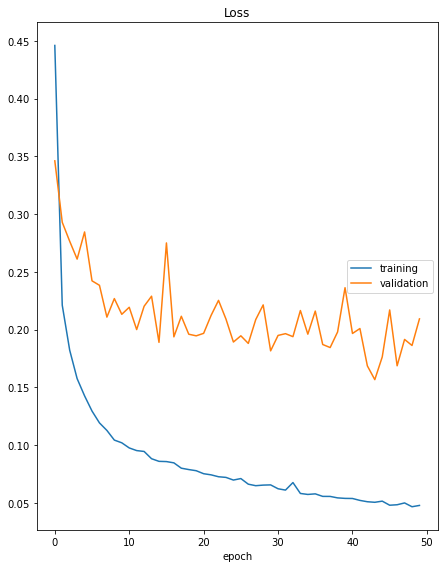

Loss
	training         	 (min:    0.047, max:    0.446, cur:    0.048)
	validation       	 (min:    0.157, max:    0.346, cur:    0.209)
Train: 0.046, Test: 0.209


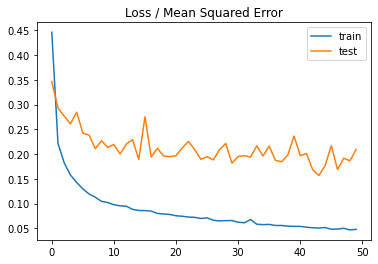

In [33]:
# define model
model = Sequential()
model.add(Dense(16, input_dim=16, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(3, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=50, verbose=0, callbacks=[PlotLossesKeras()])
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plt.title('Loss / Mean Squared Error')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()

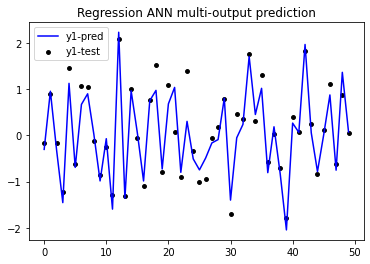

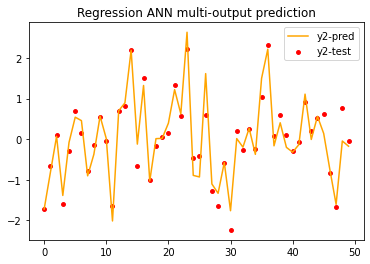

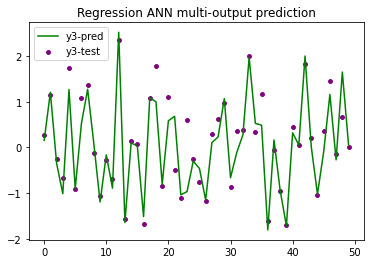

In [34]:
predictions = model.predict(testX_before) 

N = 50
x_ax = range(len(testX))[:N]
plt.title("Regression ANN multi-output prediction")
plt.scatter(x_ax, testy_before[:N,0],  s=15, label="y1-test", color='black')
plt.plot(x_ax, predictions[:N,0], label="y1-pred", color='blue')
plt.legend()
plt.show()

plt.title("Regression ANN multi-output prediction")
plt.scatter(x_ax, testy_before[:N,1],  s=15, label="y2-test", color='red')
plt.plot(x_ax, predictions[:N,1], label="y2-pred", color='orange')
plt.legend()
plt.show()

plt.title("Regression ANN multi-output prediction")
plt.scatter(x_ax, testy_before[:N,2],  s=15, label="y3-test", color='purple')
plt.plot(x_ax, predictions[:N,2], label="y3-pred", color='green')
plt.legend()
plt.show()

In [100]:
# # make class predictions with the model
# # indexes = [10,25,500]
# start = 6000
# stop = 6050
# indexes = np.linspace(start, stop, num=stop-start+1, dtype=int)
# with open('vectors-50-moves.csv', 'w', newline='') as csvfile:
# 	for i in indexes:
# 		predictions = model.predict(X2[i:i+1]) 
# 		# print('%s => %s (expected %s) \n' % (X2[i:i+1].tolist(), predictions, Y2[i:i+1]))

# 		csvwriter = csv.writer(csvfile, delimiter=' ')
# 		csvwriter.writerow([*predictions[0], *Y2[i:i+1][0]])

In [35]:
print(testy_before[:N,0])
print(testy_before[:N,1])
print(testy_before[:N,2])

[-0.17354704  0.89617477 -0.17110246 -1.2251394   1.46222876 -0.62178086
  1.07009305  1.05125708 -0.1188761  -0.84823637 -0.24049738 -1.28023425
  2.08962329 -1.31164636  1.0135145  -0.05808666 -1.08937348  0.77527414
  1.526028   -0.79112086  1.09182577  0.08265319 -0.89351052  1.39793495
 -0.33996202 -1.00634262 -0.93968902 -0.06191603  0.17718629  0.78120896
 -1.70584513  0.4622834   0.35192414  1.77629342  0.31457721  1.30013771
 -0.56531535  0.02541051 -0.69887691 -1.79585646  0.39773525  0.08317602
  1.83528829  0.25511604 -0.82763409  0.11403705  1.11224435 -0.62224717
  0.86989202  0.05220195]
[-1.72261684 -0.66402896  0.09468438 -1.60595427 -0.28659387  0.69269957
  0.16466584 -0.78165678 -0.14707785  0.54111778 -0.04232911 -1.65143775
  0.69609586  0.82300986  2.20235053 -0.66215206  1.50655794 -1.00164701
 -0.17818072  0.05535892  0.1599289   1.32691207  0.56551745  2.22692895
 -0.4727642  -0.40430214  0.59796095 -1.27715764 -1.64357265 -0.57644042
 -2.23288262  0.21212452 